# Brazil analysis
<p>Autor: Rômulo Lima Gava <br>
Data: 09/12/2020<br>
Location: São Paulo, Brazil</p>
Analysis of suicide rates using Brazil data from kaggle<br>
Url: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016?select=master.csv

## Setup:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("Data/master.csv")

## Functions:

getandreset:<br>
inputs:
<ul><li>df: (dataframe)</li>
<li>column: name of a df column (string)</li>
<li>target: column element (string)</li></ul><br>
returns: df_temp: filtered dataframe with column=target with reseted index

In [15]:
def getandreset(df,column,target):
    """
    df: dataframe
    column: string
    target: string
    return: dataframe
    """
    df_temp=df.loc[(df[column]==target)]
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp
    

mult_getandreset:<br>
inputs:
<ul><li>df: (dataframe)</li>
<li>column: name of a df column (string)</li>
<li>target: n elements from column in list format (list)</li></ul><br>
returns: df_temp: filtered dataframe with column=target with reseted index

In [16]:
def mult_getandreset(df,column,values):
    """
    df: dataframe
    column: string
    target: list
    return: dataframe
    """
    df_temp=df.loc[df[column].isin(values)]
    df_temp.reset_index(drop=True, inplace=True)
    return df_temp

## Main:

In [17]:
df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [18]:
countries=df['country'].value_counts()
#countries=countries[countries>40]
print(countries)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Brazil                    372
                         ... 
Bosnia and Herzegovina     24
Cabo Verde                 12
Dominica                   12
Macau                      12
Mongolia                   10
Name: country, Length: 101, dtype: int64


In [19]:
df_country=getandreset(df,column="country",target="Brazil")
df_country.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Brazil,1985,male,75+ years,129,840300,15.35,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
1,Brazil,1985,male,55-74 years,535,5364900,9.97,Brazil1985,0.576,"222,942,790,435",1898,G.I. Generation
2,Brazil,1985,male,35-54 years,1011,11986300,8.43,Brazil1985,0.576,"222,942,790,435",1898,Silent
3,Brazil,1985,male,25-34 years,791,10762900,7.35,Brazil1985,0.576,"222,942,790,435",1898,Boomers
4,Brazil,1985,male,15-24 years,661,13834000,4.78,Brazil1985,0.576,"222,942,790,435",1898,Generation X


There are multiple comparative ways to analyse the data:
<ul><li>Male x Female over the years</li>
<li>Male x female pie chart in most recent data</li>
<li>Generations X generation over the years</li>
<li>Generations X generation pie chart in most recent data</li>
<li>Age x Age over the years</li>
<li>Age x Age pie chart in most recent data</li> 
</ul>

## Male x Female

### Over the years

In [20]:
df_group=df_country.groupby(["year","sex"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'sex', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,female,1066,58996800,13.08,3.456,11388
1,1985,male,3162,58482100,46.10,3.456,11388
2,1986,female,1154,60498100,13.36,0.000,13542
3,1986,male,3117,58278300,43.80,0.000,13542
4,1987,female,1163,62069011,13.32,0.000,14364


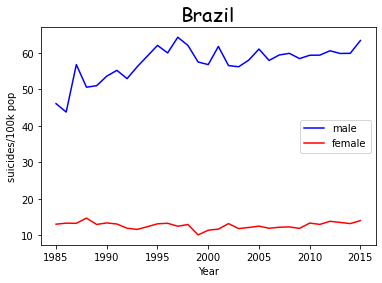

In [23]:
country='Brazil'
df_male=getandreset(df_group,column='sex',target='male')
df_female=getandreset(df_group,column='sex',target='female')

#data
plt.plot(df_male['year'],df_male["suicides/100k pop"], label='male', color='blue')
plt.plot(df_female['year'],df_female["suicides/100k pop"], label='female', color='red')

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### Pie chart

In [25]:
df_year=getandreset(df_country,column='year',target=2015)
df_year.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Brazil,2015,male,75+ years,470,2448560,19.19,Brazil2015,NaN,"1,802,214,373,741",9431,Silent
1,Brazil,2015,male,55-74 years,1693,12987357,13.04,Brazil2015,NaN,"1,802,214,373,741",9431,Boomers
2,Brazil,2015,male,35-54 years,3238,26989063,12.00,Brazil2015,NaN,"1,802,214,373,741",9431,Generation X
3,Brazil,2015,male,25-34 years,1897,17625976,10.76,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials
4,Brazil,2015,male,15-24 years,1389,17569045,7.91,Brazil2015,NaN,"1,802,214,373,741",9431,Millenials


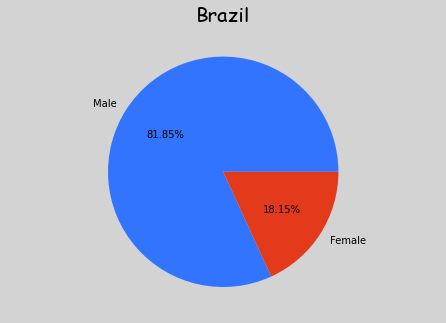

In [28]:
df_group2=df_year.groupby(["sex"],as_index=False).sum()

#getting data
df_male=getandreset(df_group2,column='sex',target='male')
df_female=getandreset(df_group2,column='sex',target='female')
numf=df_female['suicides/100k pop'][0]
numm=df_male['suicides/100k pop'][0]
names=['Male','Female']
nums=[numm,numf]

#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title('Brazil', fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%',colors=['#3374ff','#e33a1c'])
plt.show()

## Generations

### Over the years

In [27]:
df_group=df_country.groupby(["year","generation"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'generation', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,generation,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,Boomers,1060,21561600,9.84,1.152,3796
1,1985,G.I. Generation,844,12843400,31.18,2.304,7592
2,1985,Generation X,1017,58902400,7.30,2.304,7592
3,1985,Silent,1307,24171500,10.86,1.152,3796
4,1986,Boomers,1011,20509400,10.04,0.000,4514


In [30]:
df_group['generation'].value_counts()

Generation X       31
Silent             31
Boomers            30
Millenials         25
G.I. Generation    16
Generation Z        9
Name: generation, dtype: int64

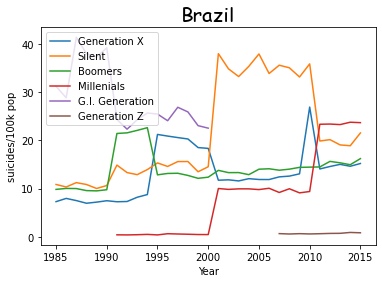

In [33]:
country='Brazil'
generations=df_group['generation'].value_counts()
for generation in generations.index:
    df_temp=getandreset(df_group,column='generation',target=generation)
    plt.plot(df_temp['year'],df_temp["suicides/100k pop"], label=generation)

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### pie chart

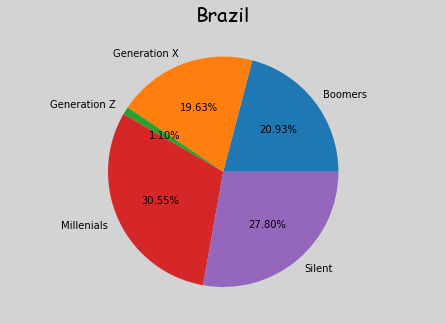

In [35]:
df_group2=df_year.groupby(["generation"],as_index=False).sum()

generations=df_group2['generation'].value_counts()
#getting data
nums=[]
names=[]
for generation in generations.index:
    df_temp=getandreset(df_group2,column='generation',target=generation)
    num=df_temp['suicides/100k pop'][0]
    nums.append(num)
    names.append(generation)


#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title('Brazil', fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%')
plt.show()

## Age

### over the years

In [36]:
df_group=df_country.groupby(["year","age"],as_index=False).sum()
print(df_group.columns)
df_group.head(5)

Index(['year', 'age', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'gdp_per_capita ($)'],
      dtype='object')


,year,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,1985,15-24 years,941,27585800,6.82,1.152,3796
1,1985,25-34 years,1060,21561600,9.84,1.152,3796
2,1985,35-54 years,1307,24171500,10.86,1.152,3796
3,1985,5-14 years,76,31316600,0.48,1.152,3796
4,1985,55-74 years,683,11015000,12.59,1.152,3796


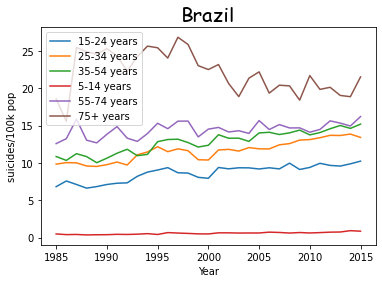

In [37]:
country='Brazil'
ages=df_group['age'].value_counts()
for age in ages.index:
    df_temp=getandreset(df_group,column='age',target=age)
    plt.plot(df_temp['year'],df_temp["suicides/100k pop"], label=age)

#Title
graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title(country, fontdict=graphdict)

#labels
plt.xlabel('Year')
plt.ylabel('suicides/100k pop')
# Add a legend
plt.legend()
plt.show()

### Pie chart

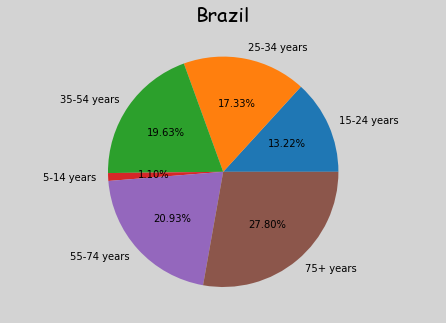

In [40]:
df_group2=df_year.groupby(["age"],as_index=False).sum()

ages=df_group2['age'].value_counts()
#getting data
nums=[]
names=[]
for age in ages.index:
    df_temp=getandreset(df_group2,column='age',target=age)
    num=df_temp['suicides/100k pop'][0]
    nums.append(num)
    names.append(age)


#plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

graphdict={'fontname': 'Comic Sans MS', 'fontsize': 20}
plt.title('Brazil', fontdict=graphdict)

fig.set_facecolor('lightgrey')

ax.pie(nums, labels = names,autopct='%1.2f%%')
plt.show()